<a href="https://colab.research.google.com/github/arunehealth/DataVizProjetcsWithPython/blob/master/Visualizing_With_Python_GlobalSuicideRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to the dataset





Datasource: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016



**Features and descriptions of the data set** 

1.  country: Contains the names of the various countries (objects)

2.  year: Contains the years from 1985 to 2016

3. sex: Binary objects of gender of the population assessed (Males Vs Females)

4. age: Grouped into age ranges: 
5-14 years#
15-24 years#
25-34 years#
35-54 years#
55-74 years#
75+ years# 

5. suicides_no: Contains the number of suicides
6. population: Contains the country-wise population data
7. suicides/100k pop: Data represents the number of suicides for every 100,000 population 
8. country-year: The data contains a combination of country and year
9. HDI for year: HDI refers to Human Development Index. The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development.(Wikipedia)
10. gdp_for_year ($): The Gross Domestic Product measures the value of economic activity within a country for a year 

11. gdp_per_capita ($): GDP per capita is a measure of a country's economic output that accounts for its number of people. It divides the country's gross domestic product by its total population. That makes it a good measurement of a country's standard of living. It tells you how prosperous a country feels to each of its citizens.
12. generation: 


G.I. Generation: 1900 - 1924

Silent: 1925 - 1942

Boomers: 1946 - 1964

Generation X: 1965 - 1980

Millenials: 1981 - 2000

Generation Z: 2001 - 2010


In [0]:
#importing the necessary libraries for initial EDA
import pandas as pd
import numpy as np
#Library for basic data viz in python
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [0]:
#importing a local file from the system with Google colab python notebook
import io

In [4]:
#importing files into colab
from google.colab import files
uploaded=files.upload()

Saving SuicideRates.csv to SuicideRates.csv


In [0]:
#reading the dataframe
df=pd.read_csv('SuicideRates.csv')

In [6]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,Unnamed: 7,country-year,Unnamed: 9,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,Albania1987,NaN,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,Albania1987,NaN,NaN,"2,156,624,900",796,Silent


In [7]:
#getting on overiew of the dataframe - count of parameters/ features and instances.
df.shape

(27820, 14)

The Dataframe has 14 features and 27820 instances.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
Unnamed: 7            0 non-null float64
country-year          27820 non-null object
Unnamed: 9            0 non-null float64
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 3.0+ MB


The feature 'year' is treated as an variable and gdp_for_year is treated as an object. 
These two features have to be converted to categorical variable and as an integer.

In [0]:
df.year=df.year.astype('object')
df.gdp_for_year=df.gdp_for_year.str.replace(',','')

In [0]:
df.gdp_for_year=df.gdp_for_year.astype('int64')

In [0]:
df.info()

Assessing the general information of the data types of the features shows the data types of all the features.

In [12]:
#getting the column headers
df.columns

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k pop', u'Unnamed: 7', u'country-year', u'Unnamed: 9',
       u'HDI for year', u' gdp_for_year ($) ', u'gdp_per_capita ($)',
       u'generation'],
      dtype='object')

In [0]:
#changing the names of the column headers
df.columns=[u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k_pop', u'Unnamed: 7', u'country_year', u'Unnamed: 9',
       u'HDI_year', u' gdp_for_year', u'gdp_per_capita',
       u'generation']

In [14]:
df.columns

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k_pop', u'Unnamed: 7', u'country_year', u'Unnamed: 9',
       u'HDI_year', u' gdp_for_year', u'gdp_per_capita', u'generation'],
      dtype='object')

In [0]:
#checking for null values
df.isnull( ).any()

In [0]:
#checking for the total number of null values in each of the columns 
df.isnull().sum()

Checking for null values showed the features (column headers ) with null values.

In [0]:
#having a final look at the dataset
df.head(2)

In [0]:
#dropping columns with null values
df.drop(['Unnamed: 7','country_year','Unnamed: 9','HDI_year'], axis=1, inplace=True)

In [0]:
#checking for null values again
df.isnull().sum()

**Visualising the number of data points for each feature**


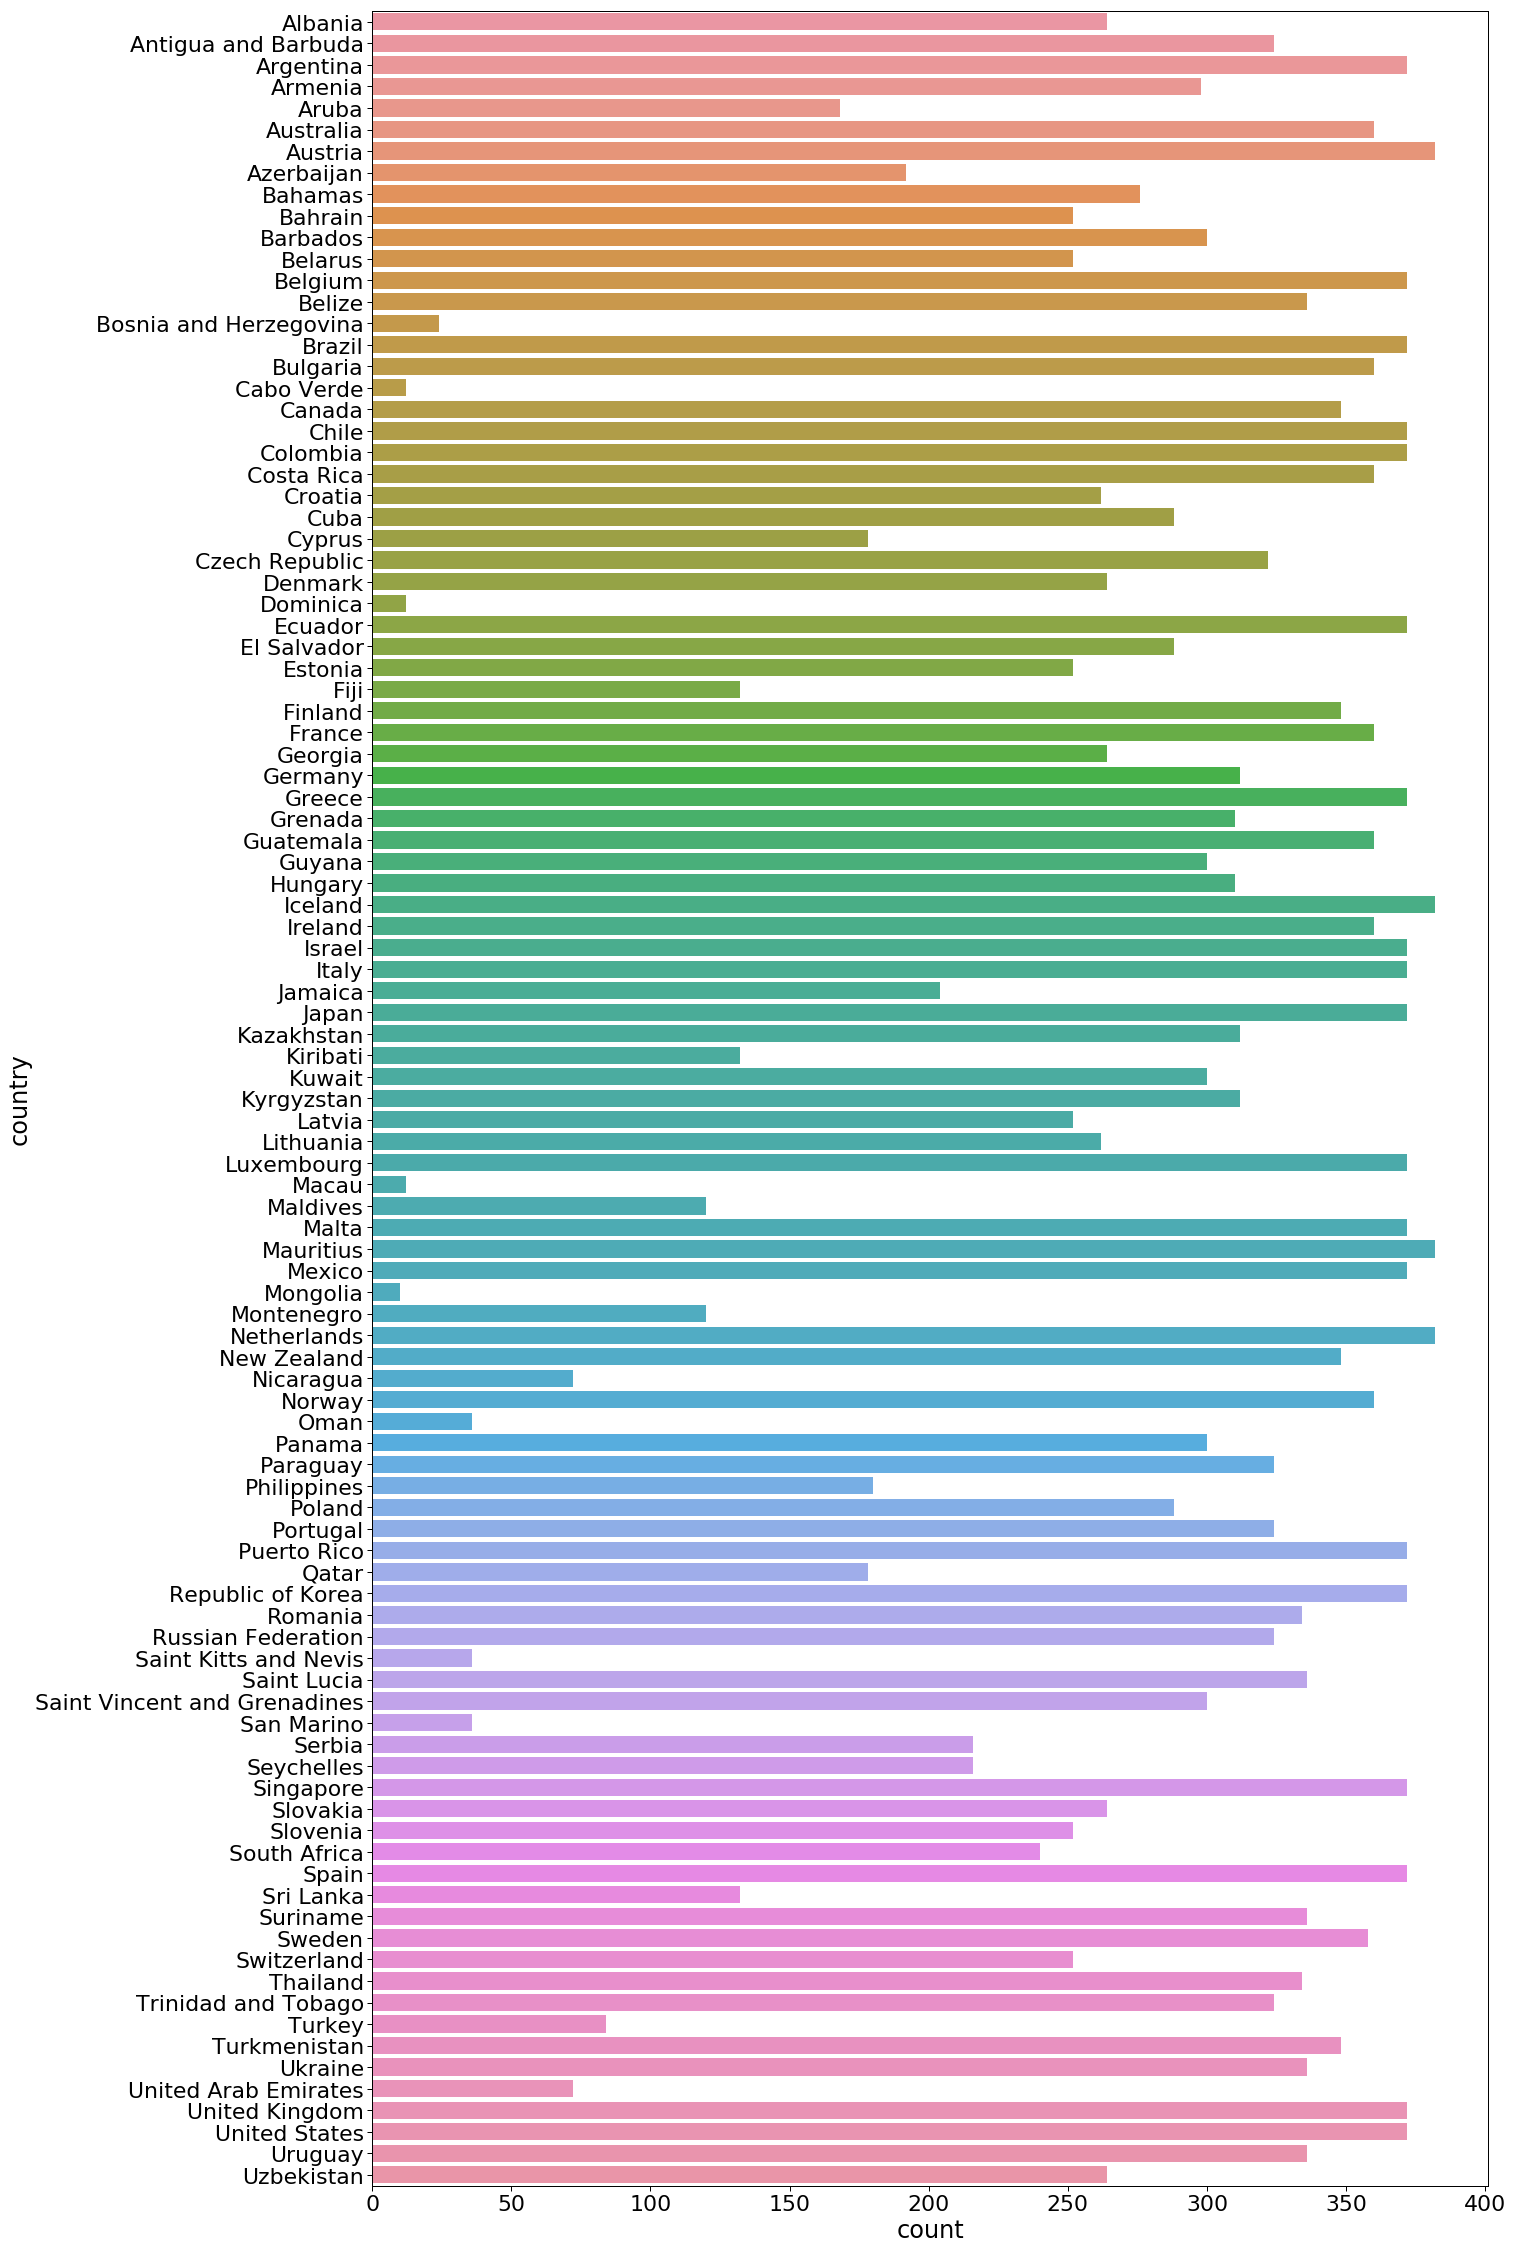

In [15]:
#Overview of the number data points for each country
plt.figure(figsize=(20,40))
y = df.country
sns.set_context("paper", 2.5, {"lines.linewidth": 4})
sns.countplot(y=y,label='count')

It can be seen from the above viz that a number countries have few data.

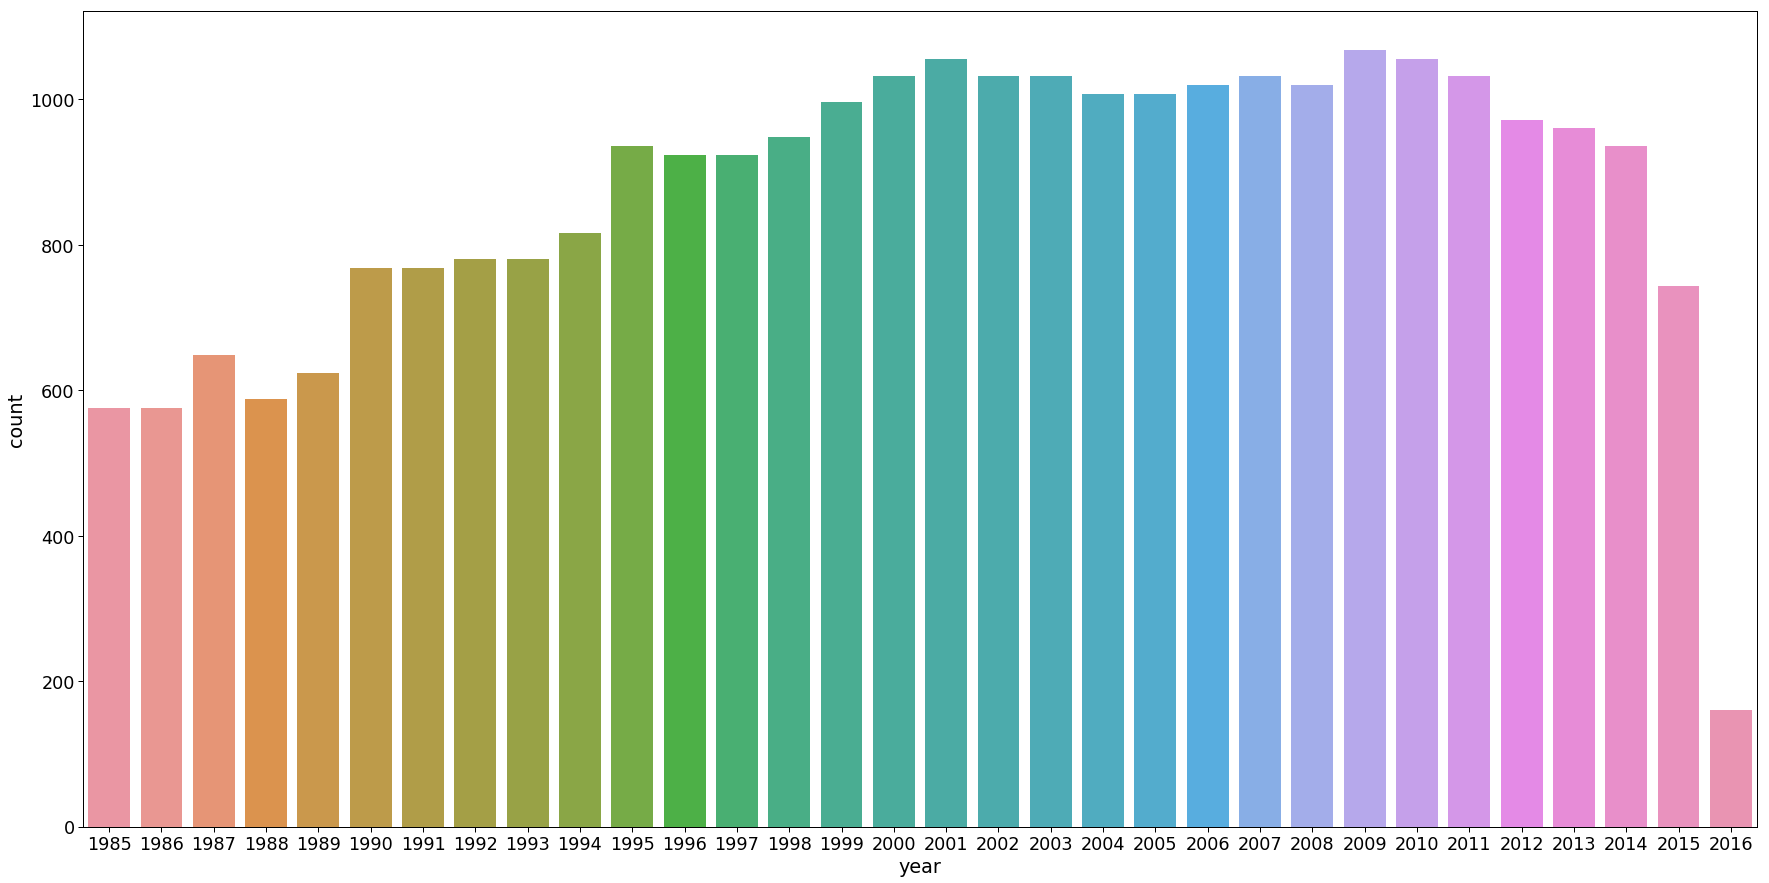

In [16]:
#Overview of the number data points for each year
plt.figure(figsize=(30,15))
y=df.year
sns.set_context('paper',2.0)
sns.countplot(y,label='count')

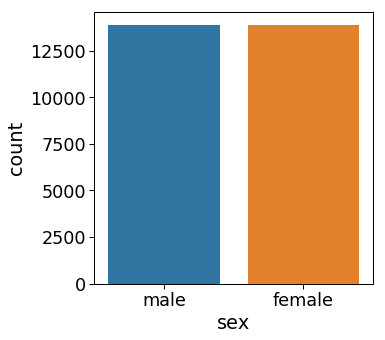

In [17]:
#checking the number of data points by gender
plt.figure(figsize=(5,5))
y=df.sex
sns.set_context('paper',2.0)
sns.countplot(y,label='count')

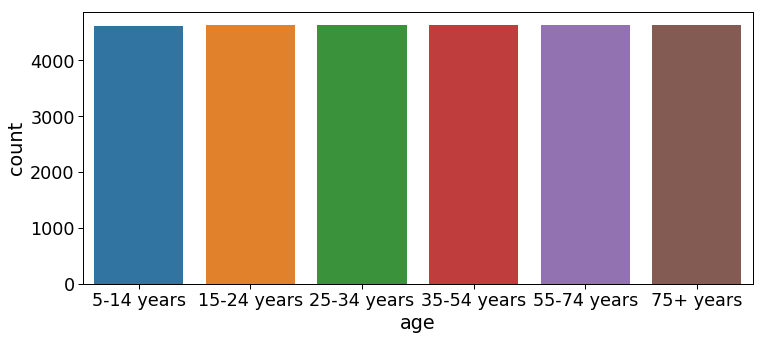

In [18]:
#checking the number of data points by age categories
plt.figure(figsize=(12,5))
y=df.age
sns.set_context('paper',2.0,{'lines.lineswidth':4})
sns.countplot(y,label='count',order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

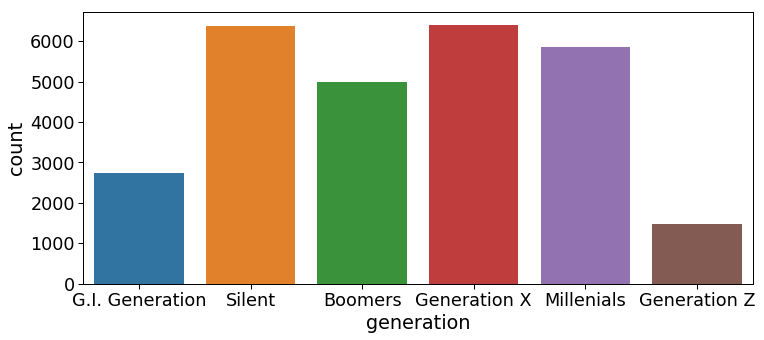

In [19]:
plt.figure(figsize=(12,5))
y=df.generation
sns.set_context('paper',2.0,{'lines.linewidth':4})
sns.countplot(y,label='generation',order=['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'])

**Inference of initial exploration of the data points**
1. Data available across countries are not uniform and some countries have minimal data points
2. The collected data was between 1985 to 2016
3. Gender-wise and age-wise: the number of data poitns are fairly uniformly dispersed

**Gender-wise distribution of suicides between 1985 and 2016**

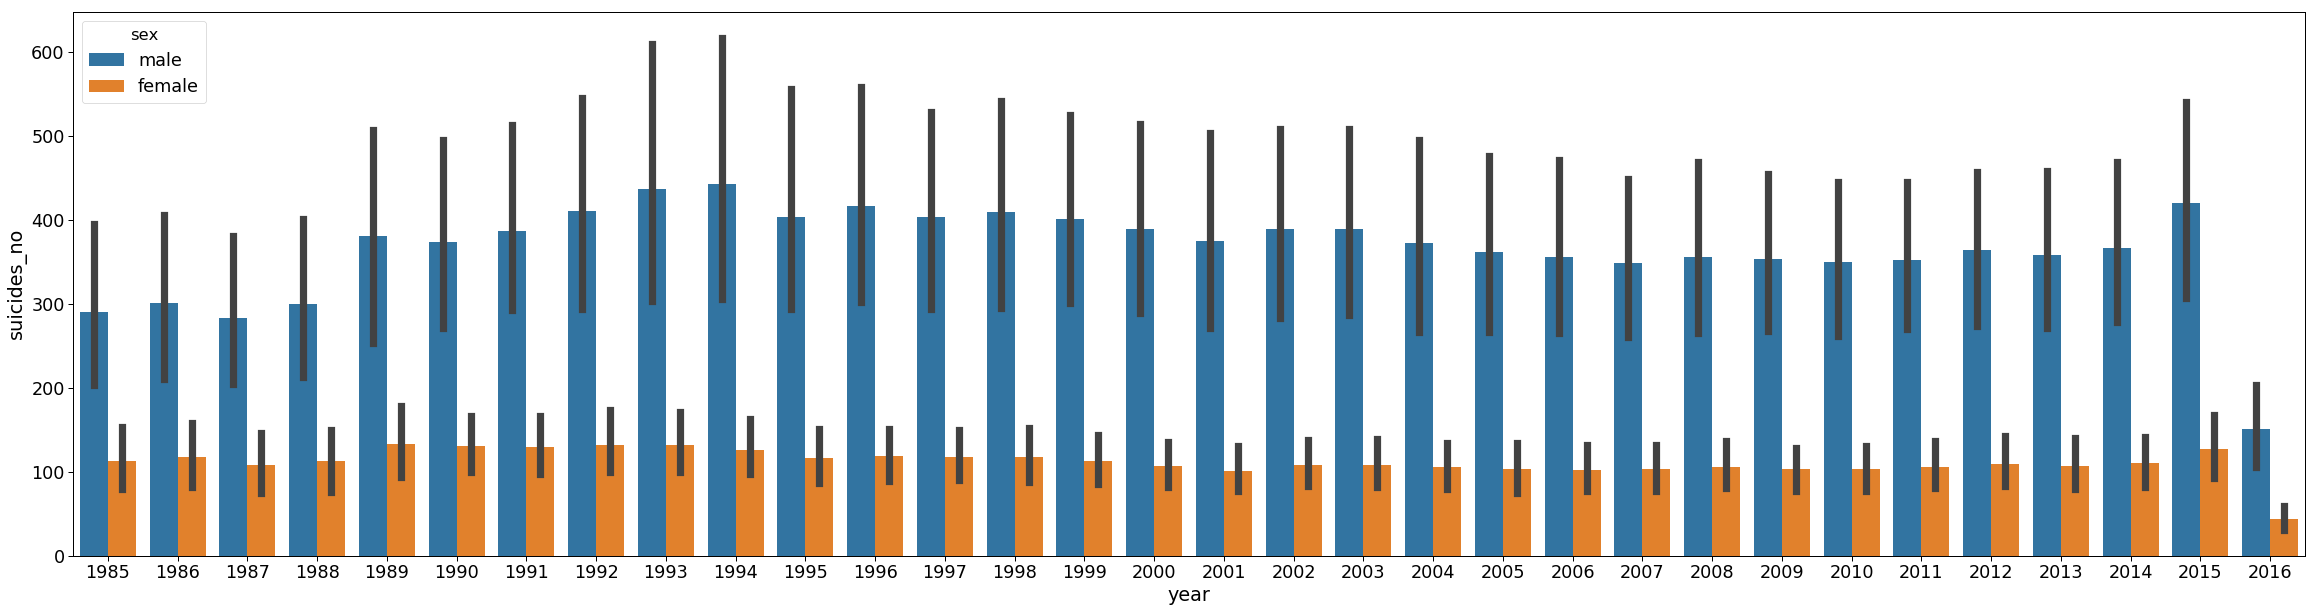

In [20]:
plt.figure(figsize=(40,10))
sns.set_context('paper',2.0, {'lines.linewidth':4})
sns.barplot(x=df.year,y= df.suicides_no, hue=df.sex)

**Inference:**
One striking finding is that the males commit suicides more than women. Even though studies have proved that women have an higher rate of depression and related psycological illnesses, males are more vulnerable to psycosomatic illnesses. 

**Age-wise analysis of suicides**


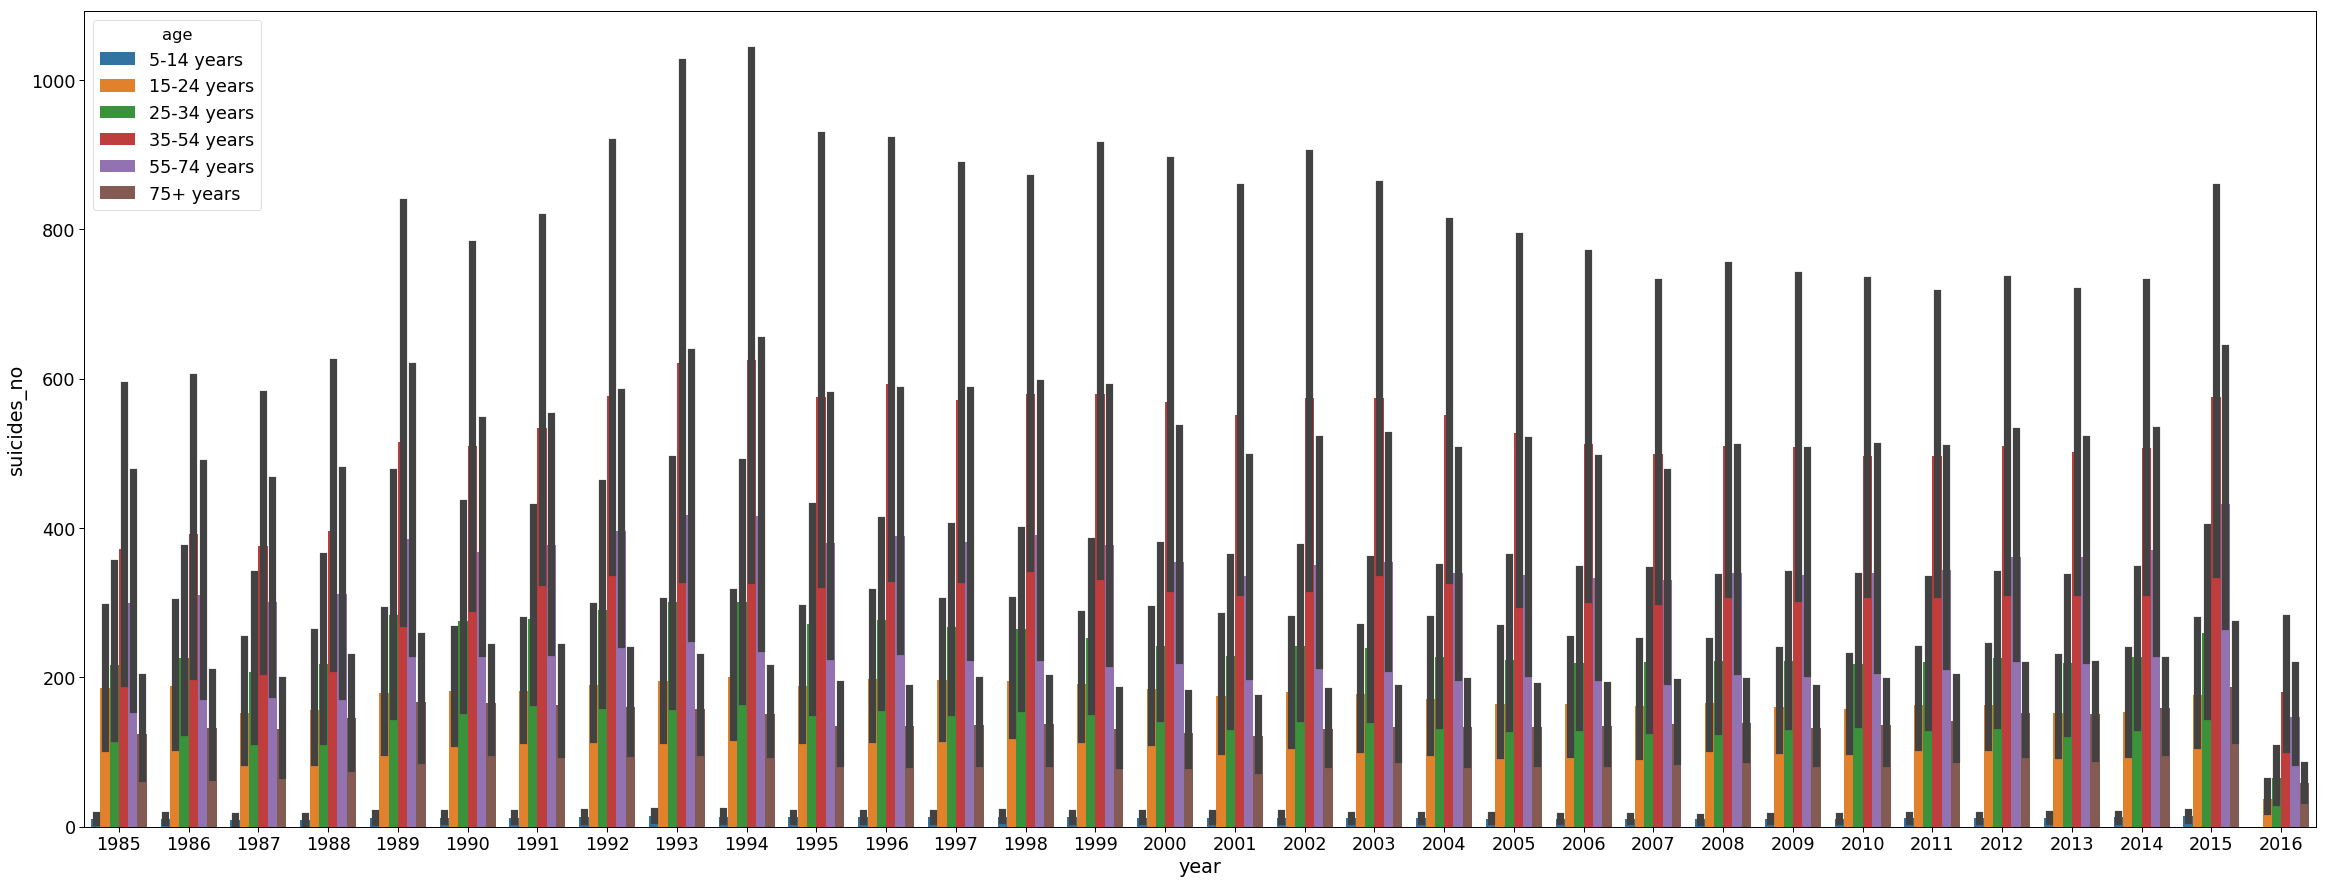

In [25]:
plt.figure(figsize=(40,15))
sns.barplot(x=df.year,y=df.suicides_no,hue=df.age,hue_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

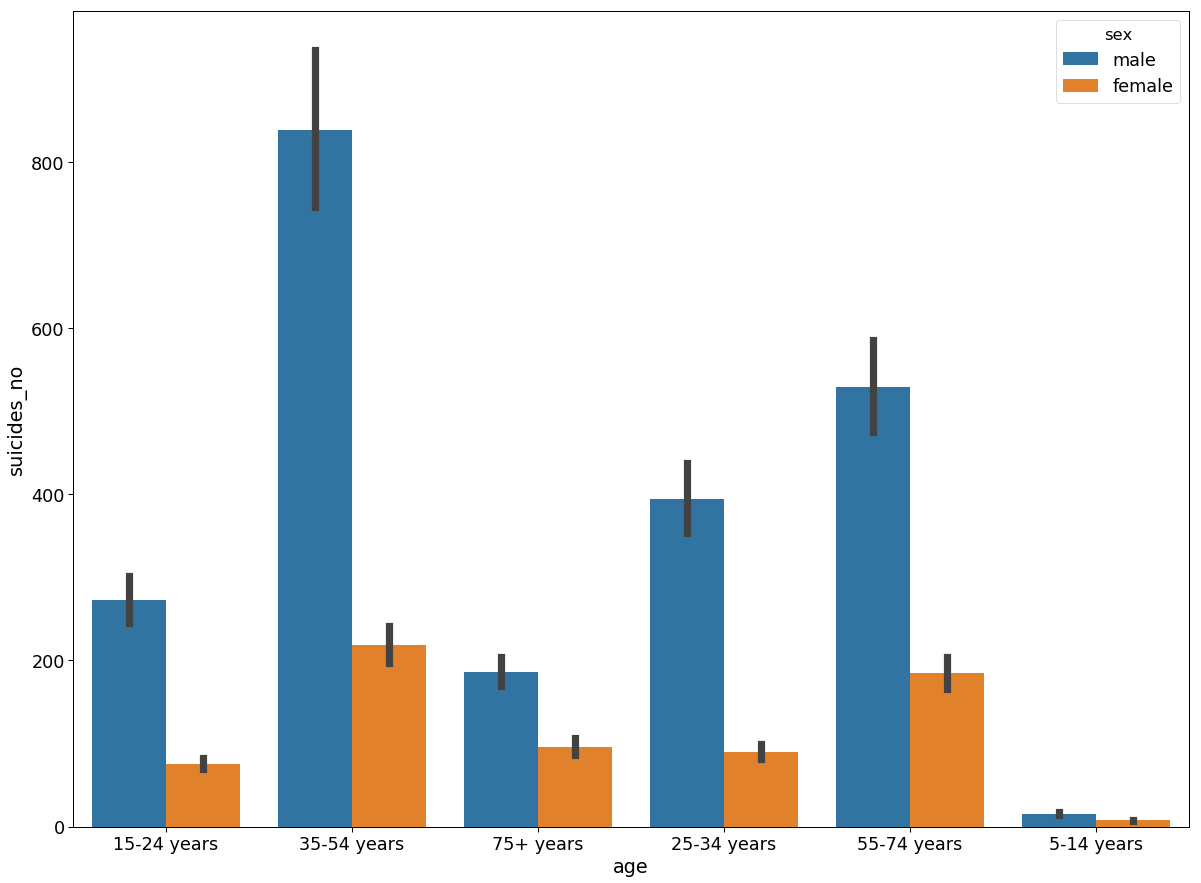

In [23]:
plt.figure(figsize=(20,15))
sns.barplot(x=df.age,y=df.suicides_no,hue=df.sex)

**Inference**

1. The third decade and the the fifth decades of the life an individual are the most vulnerable periods of an individual's life to commit suicide.
2. This is true for both the genders
3. All the common reasons for suicide more predominantly happen during this stage of an individual's life, including Using drugs and/or alcohol to help cope with emotions, relationships, the pressure of work, or other issues, Social isolation or living alone, Not being able to form or sustain meaningful relationships, Divorce or relationship breakdowns

**Country-wise suicide rate distribution**


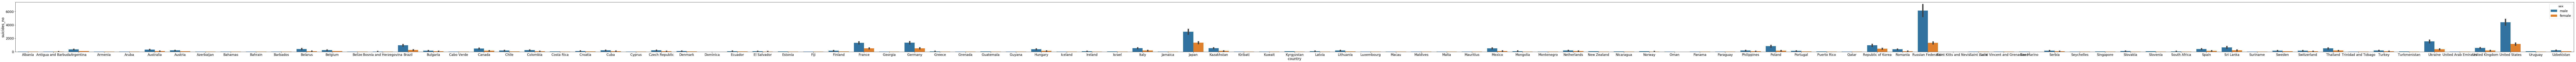

In [40]:
plt.figure(figsize=(250,5))
sns.barplot(x=df.country,y=df.suicides_no,hue=df.sex)

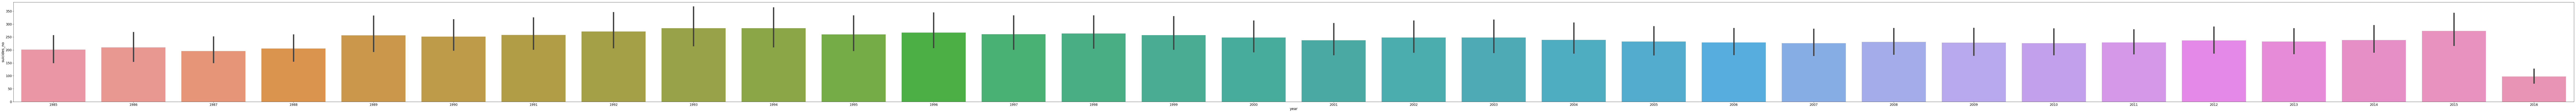

In [46]:
plt.figure(figsize=(250,10))
sns.barplot(x=df.year,y=df.suicides_no)